In [ ]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Import necessary items from Keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
import math

In [ ]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Input, BatchNormalization, Activation, Add
from tensorflow.keras.layers import AveragePooling2D, Flatten, Conv2DTranspose, concatenate, MaxPool2D, SeparableConv2D,Cropping2D,UpSampling2D

In [ ]:
def _parse_image_function(example_proto):
    """Mapping function for parsing images and annotations from the tfrecord files. Transforms and augments images and annotations before training.
        Args:
            example_proto: a single element from the dataset
        Returns:
            image: transformed image extracted from the datatset
            annotation: transformed annotation extracted from the datatset
    """

    #This descibes the structure of each element in the dataset
    image_feature_description={
        'height':tf.io.FixedLenFeature([], tf.int64),
        'width': tf.io.FixedLenFeature([], tf.int64),
        'image_raw': tf.io.FixedLenFeature([], tf.string),
        'mask_raw': tf.io.FixedLenFeature([], tf.string)
        }

    #The features are extracted to a dictionary
    feature=tf.io.parse_single_example(example_proto, image_feature_description)
    #Images and Annotations are resized to (192,192)
    image = tf.image.decode_jpeg(feature['image_raw'])
    image = tf.cast(image, tf.float32) / 255.0
    annotation = tf.image.decode_png(feature['mask_raw'], channels=1)
    annotation = tf.cast(annotation, tf.float32) / 1.0

    image = tf.reshape(image, (360,640,3))
    annotation = tf.reshape(annotation, (360,640,1))

    image = tf.image.pad_to_bounding_box(image, 140, 0, 640, 640)
    annotation = tf.image.pad_to_bounding_box(annotation, 140, 0, 640, 640)

    image = tf.image.resize(image, size=(192,192))
    annotation = tf.image.resize(annotation, size=(192,192))

    #Randomly flips images and annotations
    if(random.random() > 0.5):
        image = tf.image.flip_left_right(image)
        annotation = tf.image.flip_left_right(annotation)


    return image, annotation

In [ ]:
BATCH_SIZE = 8

train_dataset = tf.data.TFRecordDataset(['/content/drive/MyDrive/train (1).tfrecords'])
train_dataset = train_dataset.map(_parse_image_function)
ds_train = train_dataset.shuffle(buffer_size=584)

ds_train = ds_train.repeat()
#print(len(list(ds_train)))
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.TFRecordDataset('/content/drive/MyDrive/val.tfrecords')
val_dataset = val_dataset.map(_parse_image_function)
ds_val = val_dataset.shuffle(buffer_size=32)
#print(len(list(ds_val)))
ds_val = ds_val.repeat()
print(len(list(ds_val)))
ds_val = ds_val.batch(BATCH_SIZE)
ds_val = ds_val.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.TFRecordDataset('/content/drive/MyDrive/test.tfrecords')
test_dataset = test_dataset.map(_parse_image_function)
ds_test = test_dataset.shuffle(buffer_size=34)
print(len(list(ds_test)))
ds_test = ds_test.repeat()
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
print(len(ds_train))

TypeError: ignored

In [ ]:
import random
import math

In [ ]:
def _parse_image_function(example_proto):
    """Mapping function for parsing images and annotations from the tfrecord files. Transforms and augments images and annotations before training.
        Args:
            example_proto: a single element from the dataset
        Returns:
            image: transformed image extracted from the datatset
            annotation: transformed annotation extracted from the datatset
    """

    #This descibes the structure of each element in the dataset
    image_feature_description={
        'height':tf.io.FixedLenFeature([], tf.int64),
        'width': tf.io.FixedLenFeature([], tf.int64),
        'image_raw': tf.io.FixedLenFeature([], tf.string),
        'mask_raw': tf.io.FixedLenFeature([], tf.string)
        }

    #The features are extracted to a dictionary
    feature=tf.io.parse_single_example(example_proto, image_feature_description)
    #Images and Annotations are resized to (192,192)
    image = tf.image.decode_jpeg(feature['image_raw'])
    image = tf.cast(image, tf.float32) / 255.0
    annotation = tf.image.decode_png(feature['mask_raw'], channels=1)
    annotation = tf.cast(annotation, tf.float32) / 1.0

    image = tf.reshape(image, (360,640,3))
    annotation = tf.reshape(annotation, (360,640,1))

    image = tf.image.pad_to_bounding_box(image, 140, 0, 640, 640)
    annotation = tf.image.pad_to_bounding_box(annotation, 140, 0, 640, 640)

    image = tf.image.resize(image, size=(192,192))
    annotation = tf.image.resize(annotation, size=(192,192))

    #Randomly flips images and annotations
    if(random.random() > 0.5):
        image = tf.image.flip_left_right(image)
        annotation = tf.image.flip_left_right(annotation)


    return image, annotation

In [ ]:
BATCH_SIZE = 8

train_dataset = tf.data.TFRecordDataset(['/content/drive/MyDrive/train (1).tfrecords'])
train_dataset = train_dataset.map(_parse_image_function)
ds_train = train_dataset.shuffle(buffer_size=584)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.TFRecordDataset('/content/drive/MyDrive/val.tfrecords')
val_dataset = val_dataset.map(_parse_image_function)
ds_val = val_dataset.shuffle(buffer_size=32)
ds_val = ds_val.repeat()
ds_val = ds_val.batch(BATCH_SIZE)
ds_val = ds_val.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.TFRecordDataset('/content/drive/MyDrive/test.tfrecords')
test_dataset = test_dataset.map(_parse_image_function)
ds_test = test_dataset.shuffle(buffer_size=34)
ds_test = ds_test.repeat()
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
initializer = tf.keras.initializers.LecunNormal()

In [ ]:
def conv2d_block(input_tensor,n_filters,kernel_size=3):
  x=input_tensor
  for i in range(2):
    x=tf.keras.layers.Conv2D(64,3,activation='relu',padding='same',kernel_initializer=initializer)(x)
   # x=tf.keras.layers.Activation('relu')(x)l()
  return x
def encoder_block(inputs,n_filter,pool_size,dropout):
  f=conv2d_block(input_tensor=inputs,n_filters=n_filter)
  p=tf.keras.layers.MaxPooling2D(pool_size)(f)
  p=tf.keras.layers.Dropout(dropout)(p)
  return f,p
def encoder1(inputs):
  f1,p1=encoder_block(inputs,n_filter=64,pool_size=(2,2),dropout=0.3)
  f2,p2=encoder_block(p1,n_filter=128,pool_size=(2,2),dropout=0.3)
  f3,p3=encoder_block(p2,n_filter=256,pool_size=(2,2),dropout=0.3)
  f4,p4=encoder_block(p3,n_filter=512,pool_size=(2,2),dropout=0.3)
  return p4,(f1,f2,f3,f4)
def bottleneck(inputs):
  bottle_neck=conv2d_block(inputs,n_filters=1024)
  return bottle_neck
def decoder_block(inputs,conv_output,n_filter,kernel_size,strides,dropout):
  u=tf.keras.layers.Conv2DTranspose(n_filter,kernel_size,strides=strides,padding='same',kernel_initializer=initializer)(inputs)
  c=tf.keras.layers.concatenate([u,conv_output])
  c = tf.keras.layers.Dropout(dropout)(c)
  c=conv2d_block(c,n_filter,kernel_size=3)
  return c
def decoder1(inputs,convs):
  f1,f2,f3,f4=convs
  c6=decoder_block(inputs,f4,n_filter=512,kernel_size=(3,3),strides=(2,2),dropout=0.3)
  c7=decoder_block(c6,f3,n_filter=256,kernel_size=(3,3),strides=(2,2),dropout=0.3)
  c8=decoder_block(c7,f2,n_filter=128,kernel_size=(3,3),strides=(2,2),dropout=0.3)
  c9=decoder_block(c8,f1,n_filter=64,kernel_size=(3,3),strides=(2,2),dropout=0.3)
  outputs=tf.keras.layers.Conv2D(3,kernel_size=(1,1),activation='relu')(c9)
  return outputs

In [ ]:
def block(x,filters,kernel_size,activation,pool_size,strides):
    for i in range(0,3):
        x=tf.keras.layers.Conv2D(filters=filters,kernel_size=kernel_size,activation=activation,padding='same',kernel_initializer=initializer)(x)
    x=tf.keras.layers.MaxPooling2D(pool_size=pool_size,strides=strides)(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    return x
def encoder(inputs):
    x=block(inputs,filters=64,kernel_size=(2,2),activation='relu',pool_size=(2,2),strides=(2,2))
    p1=x
    x=block(inputs,filters=128,kernel_size=(2,2),activation='relu',pool_size=(2,2),strides=(2,2))
    p2=x
    x=block(x,filters=256,kernel_size=(2,2),activation='relu',pool_size=(2,2),strides=(2,2))
    p3=x
    x=block(x,filters=512,kernel_size=(2,2),activation='relu',pool_size=(2,2),strides=(2,2))
    p4=x
    x=block(x,filters=512,kernel_size=(2,2),activation='relu',pool_size=(2,2),strides=(2,2))
    p5=x
    return (p3,p4,p5)
def decoder(convs):
    f3,f4,f5=convs
    o=tf.keras.layers.Conv2DTranspose(512,kernel_size=(2,2),strides=(2,2),padding='same',kernel_initializer=initializer)(f5)
    o=tf.keras.layers.Conv2D(512,(2,2),activation='relu',padding='same',kernel_initializer=initializer)(o)
    o2=f4
    o2=tf.keras.layers.Conv2D(512,(2,2),activation='relu',padding='same',kernel_initializer=initializer)(o2)
    o=tf.keras.layers.Add()([o,o2])
    o=tf.keras.layers.Conv2DTranspose(256,kernel_size=(2,2),strides=(2,2),padding='same',kernel_initializer=initializer)(o)
    o=tf.keras.layers.Conv2D(256,(2,2),activation='relu',padding='same',kernel_initializer=initializer)(o)
    o3=f3
    o3=tf.keras.layers.Conv2D(256,(2,2),activation='relu',padding='same',kernel_initializer=initializer)(o3)
    o=tf.keras.layers.Add()([o,o3])
    o4=tf.keras.layers.Conv2DTranspose(1,kernel_size=(4,4),strides=(4,4),kernel_initializer=initializer)(o)
    o=tf.keras.layers.Activation('relu')(o4)
    return o
def fcn8():
    inputs1=tf.keras.layers.Input(shape=(192,192,3,))
    encoder_output,convs=encoder1(inputs1)
    bottle_neck=bottleneck(encoder_output)
    outputs=decoder1(bottle_neck,convs)
    inputs=outputs
    convs=encoder(inputs)
    outputs=decoder(convs)
    model=tf.keras.Model(inputs=inputs1,outputs=outputs)
    return model

In [ ]:
def step_decay(epoch):

    initial_lrate = 0.001
    drop = 0.8
    epochs_drop = 2
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [ ]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Input, BatchNormalization, Activation, Add
from tensorflow.keras.layers import AveragePooling2D, Flatten, Conv2DTranspose, concatenate, MaxPool2D, SeparableConv2D,Cropping2D,UpSampling2D

In [ ]:
lrate = LearningRateScheduler(step_decay)

#Callback to stop training after accuracy reaches 99.5%
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        try:
          if(logs.get('acc') >= 0.995):
              self.model.stop_training = True
        except:
          pass

callback = myCallBack()

#Final list of callbacks
callbacks_list = [lrate, callback]

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
iterator = iter(ds_train)
iterator1 = iter(ds_val)
iterator2=iter(ds_test)

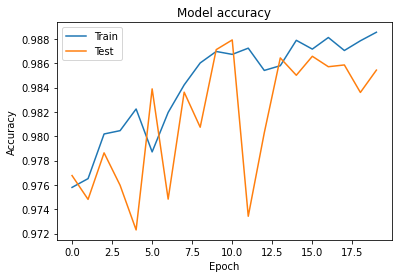

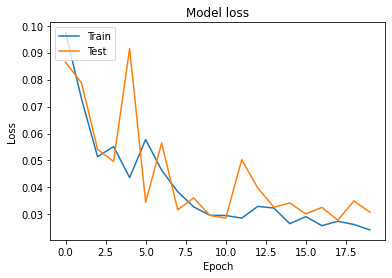

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
model.evaluate(iterator2,batch_size=16, steps=20,verbose = 1)

20/20 [==============================] - 3s 153ms/step - loss: 0.0251 - accuracy: 0.9879


[0.025111179798841476, 0.9879214763641357]

In [ ]:
model.save('/content/drive/MyDrive/gator1.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image as im
from tensorflow.keras.models import Model,load_model
model = load_model('/content/drive/MyDrive/funet (1).h5')

OSError: ignored

In [ ]:
img_path='/content/drive/MyDrive/image_1.jpg'

AttributeError: ignored

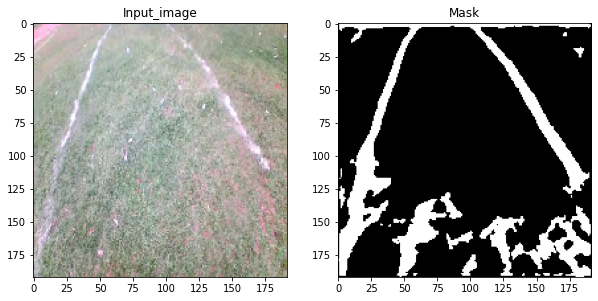

In [ ]:
def predict(img_path):
    img = image.load_img(img_path, target_size=(192,192))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_batch
    mask = model.predict([[img_preprocessed]])
    mask = np.resize(mask, (192,192))
    #mask = np.round(mask)
    mask = mask * 255

    '''print(mask[(np.where(mask >= 0.5)) and (np.where(mask <1))].size)'''
    fig = plt.figure(figsize=(10, 7))
    rows = 1
    columns = 2
    fig.add_subplot(rows, columns, 1)
    plt.imshow(img )
    plt.title("Input_image")
    fig.add_subplot(rows, columns, 2)
    plt.imshow(mask,cmap='Greys_r')
    plt.title("Mask")
    gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    y_true = img.astype(numpy.float)
    y_pred = mask.astype(numpy.float)
    intersection = K.sum(K.sum(K.abs(y_true * y_pred), axis=-1))
    sum_ = K.sum(K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1))
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth



predict(img_path)

In [ ]:
label_img = image.load_img(img_path, target_size=(192,192))
label_img = image.img_to_array(label_image)
pred_img = predict(img_path)


NameError: ignored

In [ ]:
def compute_dice(label_img, pred_img, p_threshold=0.5):
    p = pred_img.astype(numpy.float)
    l = label_img.astype(numpy.float)
    if p.max() > 127:
        p /= 255.
    if l.max() > 127:
        l /= 255.

    p = numpy.clip(p, 0, 1.0)
    l = numpy.clip(l, 0, 1.0)
    p[p > 0.5] = 1.0
    p[p < 0.5] = 0.0
    l[l > 0.5] = 1.0
    l[l < 0.5] = 0.0
    product = numpy.dot(l.flatten(), p.flatten())
    dice_num = 2 * product + 1
    pred_sum = p.sum()
    label_sum = l.sum()
    dice_den = pred_sum + label_sum + 1
    dice_val = dice_num / dice_den
    return dice_val


In [ ]:
import numpy
compute_dice(label_img, pred_img, p_threshold=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


AttributeError: ignored

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2

def display(img):
	cv2.namedWindow('frame', 0)
	cv2.imshow('frame', img)
	cv2.waitKey(0)
	cv2.destroyAllWindows()



model = load_model('/content/drive/MyDrive/gator.h5')

img = cv2.imread('/content/drive/MyDrive/image_5.jpg')
img = cv2.copyMakeBorder(img,140,140,0,0,cv2.BORDER_CONSTANT,value=(0,0,0))
img = cv2.resize(img, (192, 192))
img = img / 255

mask = model.predict([[img]])
mask = np.resize(mask, (192,192,1))
mask = np.round(mask)
mask = mask * 255
display(mask)

ValueError: ignored

In [ ]:
from keras import backend as K

def jaccard_distance_loss(y_true, y_pred, smooth=100):
    """
    Jaccard = (|X & Y|)/ (|X|+ |Y| - |X & Y|)
            = sum(|A*B|)/(sum(|A|)+sum(|B|)-sum(|A*B|))

    The jaccard distance loss is usefull for unbalanced datasets. This has been
    shifted so it converges on 0 and is smoothed to avoid exploding or disapearing
    gradient.

    Ref: https://en.wikipedia.org/wiki/Jaccard_index

    @url: https://gist.github.com/wassname/f1452b748efcbeb4cb9b1d059dce6f96
    @author: wassname
    """
    intersection = K.sum(K.sum(K.abs(y_true * y_pred), axis=-1))
    sum_ = K.sum(K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1))
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth